In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline

In [6]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

# Display the first few documents
print("Number of documents:", len(documents))
print("Sample document:", documents[0])

Number of documents: 18846
Sample document: 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [7]:
# Function to preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    return text

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Display a few preprocessed documents
print("Sample preprocessed document:", preprocessed_documents[0])

Sample preprocessed document: 

i am sure some bashers of pens fans are pretty confused about the lack
of any kind of posts about the recent pens massacre of the devils. actually,
i am  bit puzzled too and a bit relieved. however, i am going to put an end
to non-pittsburghers' relief with a bit of praise for the pens. man, they
are killing those devils worse than i thought. jagr just showed you why
he is much better than his regular season stats. he is also a lot
fo fun to watch in the playoffs. bowman should let jagr have a lot of
fun in the next couple of games since the pens are going to beat the pulp out of jersey anyway. i was very disappointed not to see the islanders lose the final
regular season game.          pens rule!!!




In [8]:
# Create a Document-Term Matrix using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(preprocessed_documents)

# Convert to DataFrame for better visualization
dtm = pd.DataFrame(doc_term_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the shape of the Document-Term Matrix
print("Shape of Document-Term Matrix:", dtm.shape)

Shape of Document-Term Matrix: (18846, 134101)


In [9]:
# Build the LDA model
num_topics = 5  # Set the number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the model
lda_model.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [10]:
# Function to display the topics and their top words
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

# Display the topics
no_top_words = 10
display_topics(lda_model, vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
edu use file windows like software does com program dos

Topic 1:
key space launch 1993 orbit earth ms output 04 des

Topic 2:
ax max g9v b8f a86 pl 145 1d9 34u 1t

Topic 3:
00 10 game like year good just don new car

Topic 4:
people don just think god know like time say said



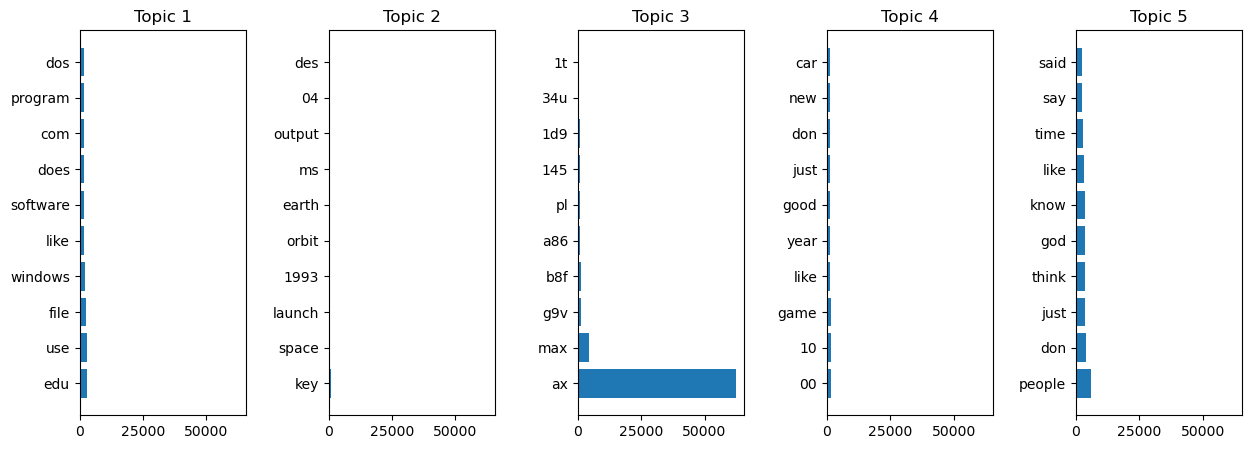

In [11]:
# Create a function to plot the topics
def plot_top_words(model, feature_names, no_top_words):
    fig, axes = plt.subplots(1, num_topics, figsize=(15, 5), sharex=True)
    for i, ax in enumerate(axes):
        top_words = model.components_[i].argsort()[:-no_top_words - 1:-1]
        ax.barh(range(no_top_words), model.components_[i][top_words], align='center')
        ax.set_yticks(range(no_top_words))
        ax.set_yticklabels([feature_names[j] for j in top_words])
        ax.set_title(f'Topic {i + 1}')
    plt.subplots_adjust(wspace=0.5)
    plt.show()

# Plot the topics
plot_top_words(lda_model, vectorizer.get_feature_names_out(), no_top_words)


In [12]:
# Assign topics to documents
topic_assignments = lda_model.transform(doc_term_matrix)
top_topic_assignments = np.argmax(topic_assignments, axis=1)

# Create a DataFrame to show document and its assigned topic
topic_df = pd.DataFrame({'Document': documents, 'Assigned Topic': top_topic_assignments})
print(topic_df.head())

                                            Document  Assigned Topic
0  \n\nI am sure some bashers of Pens fans are pr...               3
1  My brother is in the market for a high-perform...               0
2  \n\n\n\n\tFinally you said what you dream abou...               4
3  \nThink!\n\nIt's the SCSI card doing the DMA t...               0
4  1)    I have an old Jasmine drive which I cann...               0


In [13]:
import joblib

# Save the LDA model and vectorizer for future use
joblib.dump(lda_model, 'lda_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']